##ASSIGNMENT 4
#PART - A

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage



In [2]:
from google.colab import files

uploaded = files.upload()
uploaded_files = list(uploaded.keys())

Saving image2.webp to image2 (1).webp
Saving image1.jpg to image1 (3).jpg


In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_and_convert_image(image_path):
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)
    return img_array


image1_path = uploaded_files[0]
image2_path = uploaded_files[1]

img1_array = load_and_convert_image(image1_path)
img2_array = load_and_convert_image(image2_path)

In [4]:

prewitt_kernel_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
], dtype=float)

prewitt_kernel_y = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
], dtype=float)

sobel_kernel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=float)

sobel_kernel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=float)

def apply_filter(image, kernel):
    h, w = kernel.shape
    result = np.zeros((image.shape[0] - h + 1, image.shape[1] - w + 1))

    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i, j] = np.sum(image[i:i+h, j:j+w] * kernel)

    return result

prewitt_x_img1 = apply_filter(img1_array, prewitt_kernel_x)
prewitt_y_img1 = apply_filter(img1_array, prewitt_kernel_y)
sobel_x_img1 = apply_filter(img1_array, sobel_kernel_x)
sobel_y_img1 = apply_filter(img1_array, sobel_kernel_y)

prewitt_x_img2 = apply_filter(img2_array, prewitt_kernel_x)
prewitt_y_img2 = apply_filter(img2_array, prewitt_kernel_y)
sobel_x_img2 = apply_filter(img2_array, sobel_kernel_x)
sobel_y_img2 = apply_filter(img2_array, sobel_kernel_y)


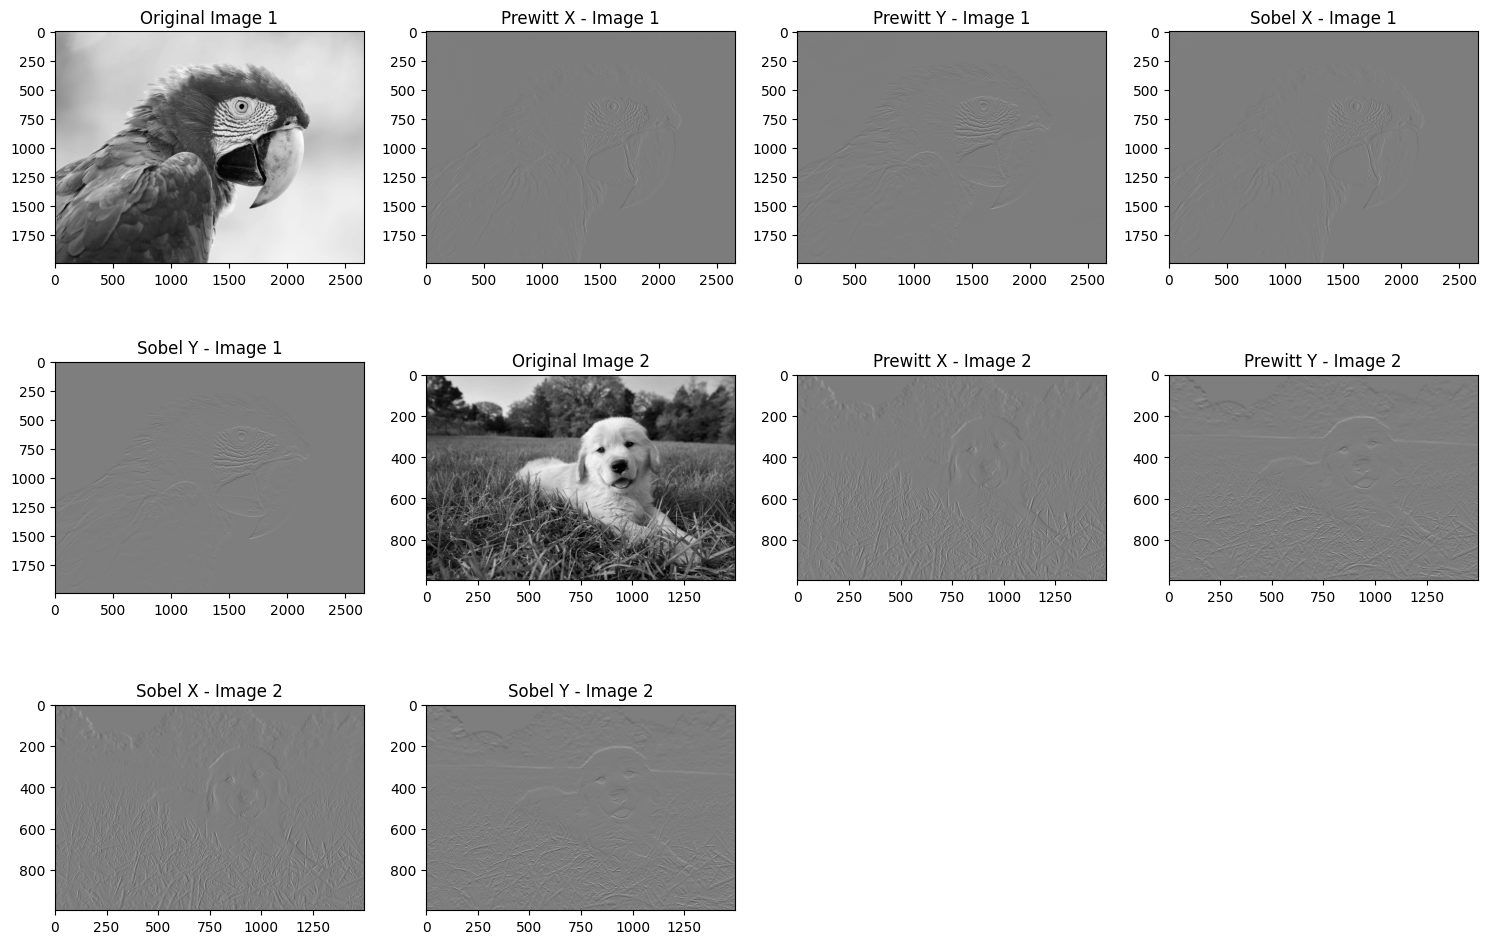

In [5]:
plt.figure(figsize=(15, 10))

# Image 1
plt.subplot(3, 4, 1)
plt.title("Original Image 1")
plt.imshow(img1_array, cmap='gray')

plt.subplot(3, 4, 2)
plt.title("Prewitt X - Image 1")
plt.imshow(prewitt_x_img1, cmap='gray')

plt.subplot(3, 4, 3)
plt.title("Prewitt Y - Image 1")
plt.imshow(prewitt_y_img1, cmap='gray')

plt.subplot(3, 4, 4)
plt.title("Sobel X - Image 1")
plt.imshow(sobel_x_img1, cmap='gray')

plt.subplot(3, 4, 5)
plt.title("Sobel Y - Image 1")
plt.imshow(sobel_y_img1, cmap='gray')

# Image 2
plt.subplot(3, 4, 6)
plt.title("Original Image 2")
plt.imshow(img2_array, cmap='gray')

plt.subplot(3, 4, 7)
plt.title("Prewitt X - Image 2")
plt.imshow(prewitt_x_img2, cmap='gray')

plt.subplot(3, 4, 8)
plt.title("Prewitt Y - Image 2")
plt.imshow(prewitt_y_img2, cmap='gray')

plt.subplot(3, 4, 9)
plt.title("Sobel X - Image 2")
plt.imshow(sobel_x_img2, cmap='gray')

plt.subplot(3, 4, 10)
plt.title("Sobel Y - Image 2")
plt.imshow(sobel_y_img2, cmap='gray')

plt.tight_layout()
plt.show()


#https://images.app.goo.gl/s4mwKkXPq6h1KKay8
#https://images.app.goo.gl/v17EFAyjC84FqmAG8

#Download the images from the above links and then apply the convolution filters(manually)
#a) apply prewitt filter
#b) apply sobel filter
#then output the resulting image

Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)



### 3.1 - Zero-Padding

Zero-padding adds zeros around the border of an image:


In [6]:
#Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K.


In [7]:
def corr2d(X: np.array, K: np.array) -> np.array:
   h, w = K.shape
   Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
   for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = np.sum(X[i:i+h, j:j+w] * K)
   return Y

In [8]:
#use the above corr2d in model

class Model:
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs
        self.kernel = np.random.randn(1, 2)
        print(f"Initial kernel: {self.kernel}")

    def fit(self, X, Y):
        for epoch in range(self.epochs):
            Y_hat = corr2d(X[0, 0], self.kernel)
            loss = np.mean((Y_hat - Y[0, 0]) ** 2)
            grad = np.zeros_like(self.kernel)

            for i in range(grad.shape[0]):
                for j in range(grad.shape[1]):
                    self.kernel[i, j] -= self.lr * 2 * np.sum((Y_hat - Y[0, 0]) * X[0, 0, i:i+Y_hat.shape[0], j:j+Y_hat.shape[1]])

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}, Kernel: {self.kernel}")

In [9]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [10]:
K = np.array([[1.0, -1.0]], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K)
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [11]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

In [12]:
# gd = model(3e-2,100)
# gd.fit(X,Y)
gd = Model(lr=3e-2, epochs=100)
gd.fit(X, Y)

Initial kernel: [[-1.78677457  1.55408152]]
Epoch 0, Loss: 2.0568195727193035, Kernel: [[-0.61599673  0.80215117]]
Epoch 10, Loss: 0.0004937783046259858, Kernel: [[ 0.99028981 -0.97030163]]
Epoch 20, Loss: 2.6064438301800573e-06, Kernel: [[ 1.00084593 -0.99869972]]
Epoch 30, Loss: 2.9639994184476772e-08, Kernel: [[ 1.0001126  -0.99988216]]
Epoch 40, Loss: 3.4167133437390143e-10, Kernel: [[ 1.00001234 -0.9999876 ]]
Epoch 50, Loss: 3.939195039926003e-12, Kernel: [[ 1.00000133 -0.99999867]]
Epoch 60, Loss: 4.5415825797868666e-14, Kernel: [[ 1.00000014 -0.99999986]]
Epoch 70, Loss: 5.236088224501926e-16, Kernel: [[ 1.00000002 -0.99999998]]
Epoch 80, Loss: 6.0367988000706005e-18, Kernel: [[ 1. -1.]]
Epoch 90, Loss: 6.959959849734532e-20, Kernel: [[ 1. -1.]]


In [13]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image,
    as illustrated in Figure 1.

    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions

    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """

    # YOUR CODE STARTS HERE
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values=(0, 0))
    # YOUR CODE ENDS HERE

    return X_pad

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


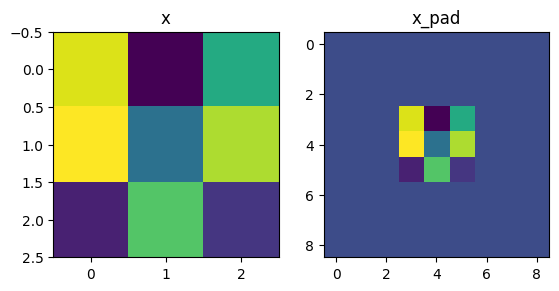

In [14]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 3)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])

In [15]:

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation
    of the previous layer.

    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)

    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """

    # YOUR CODE ENDS HERE
    Z = np.sum(a_slice_prev * W) + float(b)

    return Z

In [16]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

assert (type(Z) == np.float64), "You must cast the output to numpy float 64"
assert np.isclose(Z, -6.999089450680221), "Wrong value"

Z = -6.999089450680221


<ipython-input-15-95193397b4ae>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z = np.sum(a_slice_prev * W) + float(b)



### 3.3 - Convolutional Neural Networks - Forward Pass

In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume:

### Exercise 3 -  conv_forward
Implement the function below to convolve the filters `W` on an input activation `A_prev`.  
This function takes the following inputs:
* `A_prev`, the activations output by the previous layer (for a batch of m inputs);
* Weights are denoted by `W`.  The filter window size is `f` by `f`.
* The bias vector is `b`, where each filter has its own (single) bias.

You also have access to the hyperparameters dictionary, which contains the stride and the padding.

In [17]:
a_slice_prev.shape

(4, 4, 3)

In [18]:

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function

    Arguments:
    A_prev -- output activations of the previous layer,
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"

    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    """

    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C) = W.shape
    stride = hparameters["stride"]
    pad = hparameters["pad"]

    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1

    Z = np.zeros((m, n_H, n_W, n_C))

    A_prev_pad = zero_pad(A_prev, pad)

    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f

                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]

                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:, :, :, c], b[:, :, :, c])

    cache = (A_prev, W, b, hparameters)
    return Z, cache


In [19]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
z_mean = np.mean(Z)
z_0_2_1 = Z[0, 2, 1]
cache_0_1_2_3 = cache_conv[0][1][2][3]
print("Z's mean =\n", z_mean)
print("Z[0,2,1] =\n", z_0_2_1)
print("cache_conv[0][1][2][3] =\n", cache_0_1_2_3)



Z's mean =
 0.5511276474566768
Z[0,2,1] =
 [-2.17796037  8.07171329 -0.5772704   3.36286738  4.48113645 -2.89198428
 10.99288867  3.03171932]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


<ipython-input-15-95193397b4ae>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z = np.sum(a_slice_prev * W) + float(b)



## 4 - Pooling Layer

These pooling layers have no parameters for backpropagation to train. However, they have hyperparameters such as the window size $f$. This specifies the height and width of the $f \times f$ window you would compute a *max* or *average* over.

<a name='4-1'></a>
### 4.1 - Forward Pooling
Now, you are going to implement MAX-POOL and AVG-POOL, in the same function.

<a name='ex-4'></a>
### Exercise 4 - pool_forward

Implement the forward pass of the pooling layer. Follow the hints in the comments below.





In [20]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer

    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")

    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    """
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    f = hparameters["f"]
    stride = hparameters["stride"]

    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    A = np.zeros((m, n_H, n_W, n_C))

    for i in range(m):
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f

                    a_slice_prev = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]

                    if mode == "max":
                        A[i, h, w, c] = np.max(a_slice_prev)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_slice_prev)

    # Retrieve dimensions from the input shape

    # Retrieve hyperparameters from "hparameters"

    # Define the dimensions of the output

    # Initialize output matrix A


    # YOUR CODE ENDS HERE

    return A

In [21]:
# Case 1: stride of 1
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A= pool_forward(A_prev, hparameters, mode = "max")
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])
A= pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])


mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]
mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]


**Expected output**

```
mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]

mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]
```

In [22]:
# Case 2: stride of 2
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A= pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[0] =\n", A[0])
print()

A= pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1] =\n", A[1])

mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]


**Expected output**
```
mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]
  ```